In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

## Linear Regression - Insurance Dataset

In [207]:
df = pd.read_csv("./Data/insurance.csv")
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [209]:
number = LabelEncoder()
df['sex'] = number.fit_transform(df['sex'].astype('str')) #0:Female, 1:Male
df['smoker'] = number.fit_transform(df['smoker'].astype('str')) # 1:Yes, 0: No
df['region'] = number.fit_transform(df['region'].astype('str')) #0:Northeast, 1:Northwest, 2:Southeast, 3:Southwest
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


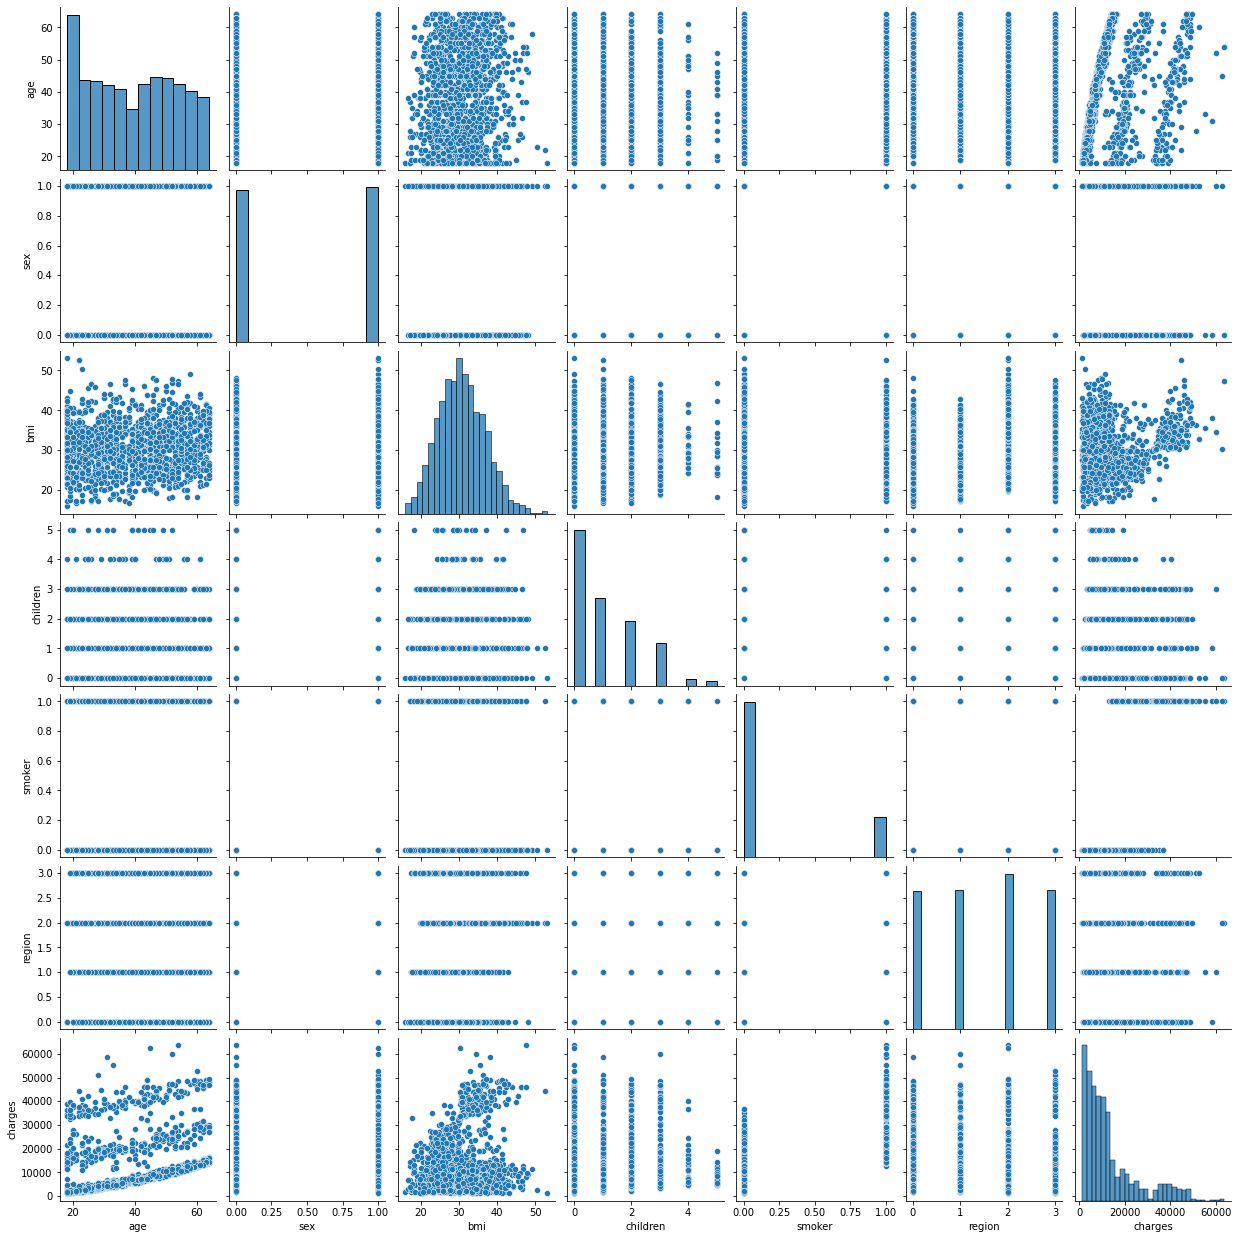

In [210]:
sns.pairplot(df)

In [211]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [212]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [213]:
model = LinearRegression()
model.fit(x_train, y_train)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
age,257.555065
sex,-231.223843
bmi,348.971868
children,459.632609
smoker,23790.043029
region,-383.102038


In [214]:
print(model.intercept_)

-12300.343722191152


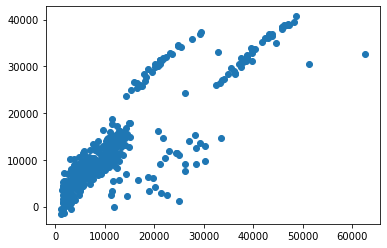

In [215]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

(array([ 35.,  64., 195.,  34.,  46.,  12.,   7.,   7.,   1.,   1.]),
 array([-10810.71988741,  -6738.06411432,  -2665.40834124,   1407.24743185,
          5479.90320494,   9552.55897802,  13625.21475111,  17697.8705242 ,
         21770.52629728,  25843.18207037,  29915.83784346]),
 <BarContainer object of 10 artists>)

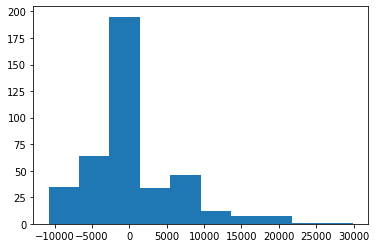

In [216]:
plt.hist(y_test - predictions)

In [217]:
print ( "Mean Absolute Error (MAE) : " +format(metrics.mean_absolute_error(y_test, predictions)))
print ( "Mean Squared Error (MSE) : " +format(metrics.mean_squared_error(y_test, predictions)))
print ( "Root Mean Squared Error (RMSE) : " +format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

Mean Absolute Error (MAE) : 4150.3567560299725
Mean Squared Error (MSE) : 36977762.09497202
Root Mean Squared Error (RMSE) : 6080.93431102261


## Logistic Regression - Advertising Dataset

In [218]:
df1 = pd.read_csv("./Data/advertising.csv")
df1.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [219]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [220]:
df1.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [221]:
number = LabelEncoder()
df1['Ad Topic Line'] = number.fit_transform(df1['Ad Topic Line'].astype('str'))
df1['City'] = number.fit_transform(df1['City'].astype('str'))
df1['Country'] = number.fit_transform(df1['Country'].astype('str'))
df1.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,91,961,0,215,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,464,903,1,147,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,566,111,0,184,2016-03-13 20:35:42,0


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

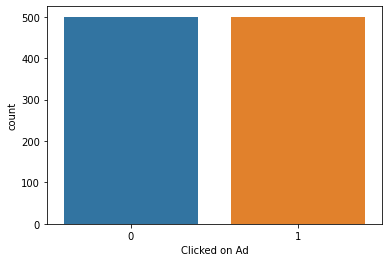

In [222]:
sns.countplot(x='Clicked on Ad', data=df1)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

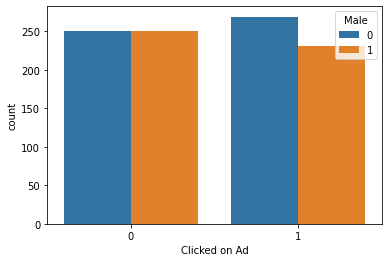

In [223]:
sns.countplot(x='Clicked on Ad', hue='Male', data=df1)

(array([ 61.,  95.,  81.,  72.,  83., 102., 123., 170., 151.,  62.]),
 array([32.6  , 38.483, 44.366, 50.249, 56.132, 62.015, 67.898, 73.781,
        79.664, 85.547, 91.43 ]),
 <BarContainer object of 10 artists>)

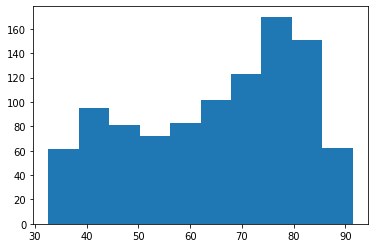

In [224]:
plt.hist(df1['Daily Time Spent on Site'].dropna())

(array([ 50., 118., 195., 159., 153., 138.,  77.,  65.,  28.,  17.]),
 array([19. , 23.2, 27.4, 31.6, 35.8, 40. , 44.2, 48.4, 52.6, 56.8, 61. ]),
 <BarContainer object of 10 artists>)

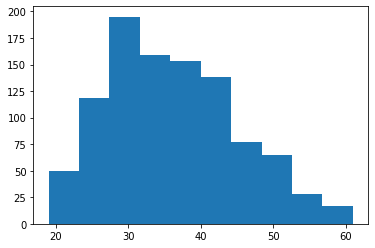

In [225]:
plt.hist(df1['Age'].dropna())

(array([ 10.,  30.,  49.,  61.,  95., 162., 170., 212., 149.,  62.]),
 array([13996.5 , 20545.33, 27094.16, 33642.99, 40191.82, 46740.65,
        53289.48, 59838.31, 66387.14, 72935.97, 79484.8 ]),
 <BarContainer object of 10 artists>)

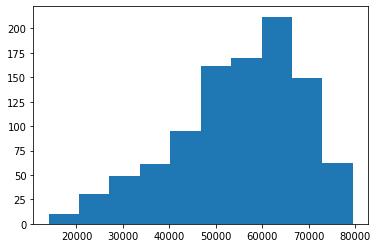

In [226]:
plt.hist(df1['Area Income'].dropna())

(array([111., 131., 104.,  98.,  77., 118., 125., 143.,  71.,  22.]),
 array([104.78 , 121.298, 137.816, 154.334, 170.852, 187.37 , 203.888,
        220.406, 236.924, 253.442, 269.96 ]),
 <BarContainer object of 10 artists>)

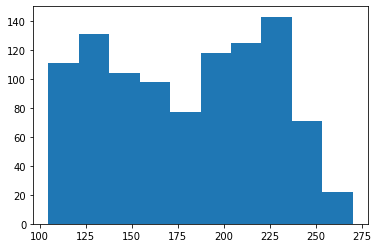

In [227]:
plt.hist(df1['Daily Internet Usage'].dropna())

In [228]:
df1.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis = 1, inplace = True)
df1

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [229]:
x_data = df1.drop('Clicked on Ad', axis = 1)
y_data = df1['Clicked on Ad']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)
model = LogisticRegression()
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       154
           1       0.92      0.86      0.89       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [230]:
print(confusion_matrix(y_test_data, predictions))

[[143  11]
 [ 20 126]]
